### Task 1: Two-Sampled T-Test
This data set, Directed Reading Activities, provides reading performance of two groups of pupils – one control group and one group that was given Directed Reading Activities. Specifically:
“An educator believes that directed reading activities in the classroom will help elementary school pupils improve their reading ability. The educator arranges for a third-grade class of 21 students to participate in these activities for a period of eight-weeks. A control class of 23 third-graders follows the same curriculum without the directed read- ing activities. At the end of the eight weeks, all students are given a Degree of Reading Power test (DRP), which measures the aspects of reading ability that the treatment is designed to improve.

Let's say the alpha value 0.05 is given.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import ptitprince as pt
import scipy.stats as stats
import matplotlib.pyplot as plt

#### a. State the null and alternative hypotheses.

H0: There will be no differences between the two groups after eight weeks and therefore Directed Reading Activites do not have an effect on reading abilities of the third-graders.  <br>
H1: Directed Reading Activities have an effect on elementary schools pupils and DRP will change after the eight-week period. <br>
Our significance value is 0.05.

#### b. What t-test is most appropriate to test the claim?
We want to compare two different sample groups which are tested independently from each other. So, we will conduct an "Between-Subject"-Design of our experiment. Therefore, an independent t-test will be applied.

#### c. Conduct the appropriate statistical test and report the relevant output here.

Both p-values: 0.26954163497519895 and 0.5537368245925618 are above 0.05 (our alpha) so that we can conclude that the data is normal distirbuted.)


TtestResult(statistic=2.2665515995859433, pvalue=0.028629482832245718, df=42.0)

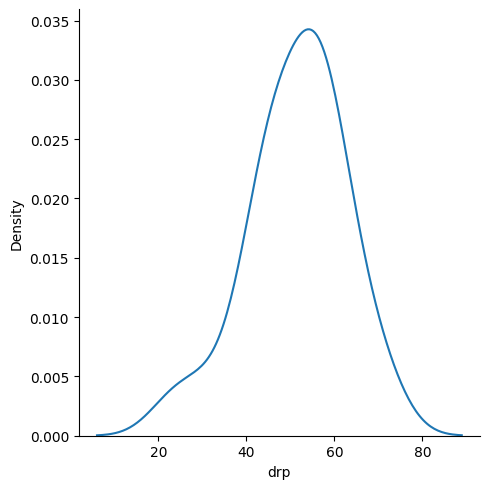

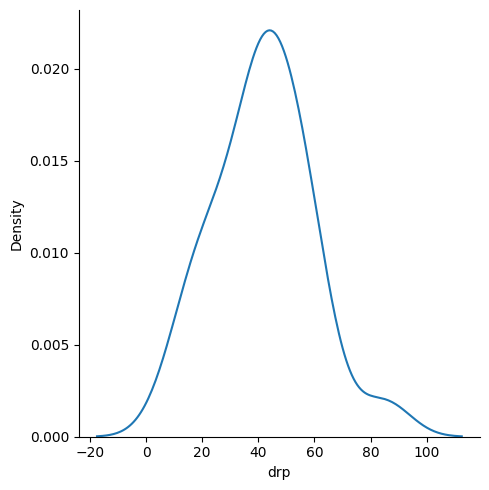

In [13]:
#Provided data: 
student_data = pd.read_csv('https://raw.githubusercontent.com/jasp-stats/jasp-desktop/development/Resources/Data%20Sets/Data%20Library/2.%20T-Tests/Directed%20Reading%20Activities.csv')

group1 = student_data[student_data['group'] == 'Treat']['drp']
group2 = student_data[student_data['group'] == 'Control']['drp']
# Mean and standard deviation for each condition
standard_dev_1 = np.std(group1)
standard_dev_2 = np.std(group2)

meanGroup1 = group1.mean()
meanGroup2 = group2.mean()
effect_size= meanGroup1-meanGroup2

# normality check to test whether both groups are normal 
#distributed and therefore valid for our t-test application
statistics_1, p_value_1 = stats.normaltest(group1)
statistics_2, p_value_2 = stats.normaltest(group2)
print(f'Both p-values: {p_value_1} and {p_value_2} are above 0.05 (our alpha) so that we can conclude that the data is normal distirbuted.)')

#detect outliers: 
sns.displot(group1, kind='kde')
sns.displot(group2, kind='kde')
#Visually I can see in those to plots, that there are no significant outliers. 

# t-ratio and p-value
stats.ttest_ind(group1, group2)

In [ ]:
# not necessary, but for me to show all rows:
with pd.option_context('display.max_rows', None,):
    print(student_data)

##### d. What is the decision about the null hypothesis? Justify your answer.

Our statistical value f(42) = 0.028629482832245718 and our p value is  0.028629482832245718 with a degree of freedom of 42.0. Because our p-value is below our alpha of 0.05, we retain our H0 and thereby fail to reject it. That means there is no difference between the results of our two independent groups and the Directive Reading tasks do not have an effect on our sample group.

##### e. Report your conclusion.

After conducting our t-test we can state that Directive Reading tasks do not have any influence on the third graders and their reading abilities after the eight week period. 

---------------------------

### Task 2: Paired T-test

"Weight Gain", provides weights of 16 participants before and after an eight-week period of excessive calorie intake (Moore et al., 2012, p. 425).
This data set, Weight Gain, provides weight of 16 participants before and after an eight-week period of excessive calorie intake. Specifi- cally:
“In one study, 16 non-obese adults aged 25 to 36 years, were fed 1000 calories per day in excess of the calories needed to maintain a stable body weight. The subjects maintained this diet for 8 weeks. In total they consumed 56,000 extra calories.

Weight Before - Weight in pounds (lb) measured before eight weeks of excessive calorie intake.<br>
Weight After - Weight in pounds (lb) measured after eight weeks of excessive calorie intake.<br>
Difference - Weight After - Weight Before.

In [15]:
weight_gain_data = pd.read_csv('https://raw.githubusercontent.com/jasp-stats/jasp-desktop/4527546659fdbd0849261f22ec84e9db76adc49d/Resources/Data%20Sets/Data%20Library/2.%20T-Tests/Weight%20Gain.csv')
with pd.option_context('display.max_rows', None,):
    print(weight_gain_data)

    Weight Before  Weight After  Difference
0          122.54        135.74       13.20
1          120.78        129.36        8.58
2          131.12        145.20       14.08
3          137.06        145.64        8.58
4          163.24        173.80       10.56
5          166.32        181.06       14.74
6          155.54        163.46        7.92
7          117.26        130.46       13.20
8          161.26        174.02       12.76
9          139.48        145.20        5.72
10         149.82        161.48       11.66
11         162.14        169.18        7.04
12         201.74        204.82        3.08
13         122.98        138.60       15.62
14         135.74        150.04       14.30
15         127.16        132.66        5.50


##### a. State the null and alternative hypotheses.

H0: There will be now effect on the weight of the participants because of the excessive calorie intake after an eight-week period. <br>
H1:  After the 8-week period the weight of the participants will change and the diet will have an effect on their weight. <br>
Our significance value is 0.05.

##### b. What t-test is most appropriate to test the claim?

We want to check the same sample group over the period of eight week. Because we want to look at the same group of people before and after that period, we have an Within-Subject Design of our experiment. For those two related samples we will take a paired t-test, also dependent t-test. 

Our std of before is 21.98390231368171 and after is 20.757308953715558
Our mean of before is 144.63625 and after is 144.63625
t-test:
TtestResult(statistic=-10.840645041817659, pvalue=8.55247087852141e-09, df=15)


/Users/klarag/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


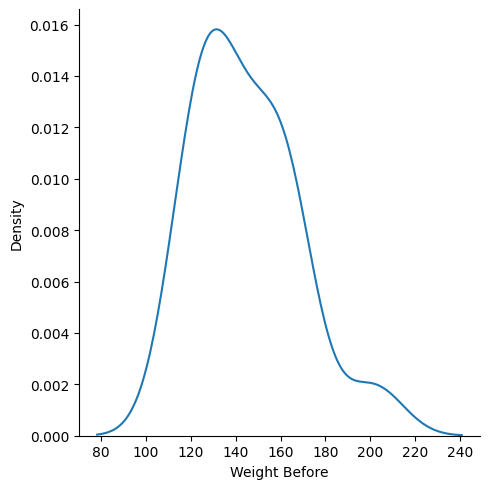

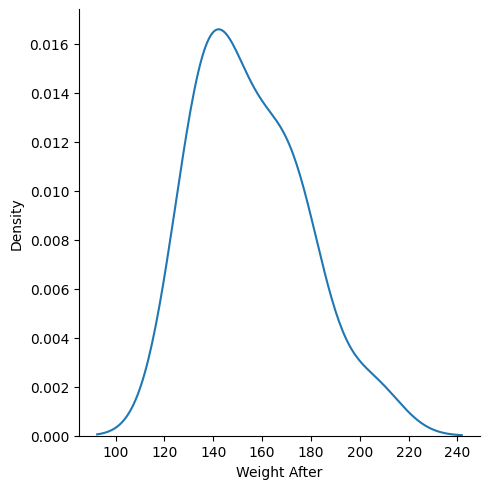

In [40]:
# c. Conduct the appropriate statistical test and report the relevant output here.
before = weight_gain_data['Weight Before']
after = weight_gain_data['Weight After']

# standard deviation
std_before = np.std(before)
std_after = np.std(after)
print(f'Our std of before is {std_before} and after is {std_after}')

# mean  
mean_before = before.mean()
mean_after = before.mean()
effect_size2= mean_before-mean_after
print(f'Our mean of before is {mean_before} and after is {mean_after}')

# check whether data sets are normal distributed
statistic_before, p_value_before = stats.normaltest(before) 
statistic_after, p_value_after = stats.normaltest(after) 
# both p-values are above our alpha 0.05 and therefore the data is normal distributed 
# and we can apply our ttest.

# outliers
sns.displot(before, kind='kde')
sns.displot(after, kind='kde')
# As we can see in both plots: there are no significant ourliers.

# t-test
print('t-test:')
ttest = stats.ttest_rel(before,after, alternative='less')
print(ttest)
# our p value is far above 0.05 (our alpa) and therefore we reject our H0.

##### d. What is the decision about the null hypothesis? Justify your answer.

We reject our H0 because the p-value of our t-test is above our given alpha value of 0.05. 

##### e. Report your conclusion.

Concluding we can say that the weight of the participants will change through the diet of the calorie intake and therefore our H0 is not true. 